---
## Step 0: Load The Data

In [1]:
# Load pickled data
from matplotlib import pyplot as plt
import numpy as np
import pickle

import tensorflow as tf

#matplotlib

#dont forget to run: source activate carnd-term1  if tensorflow doesn't exist

epochs = 10
batch_size = 128
# TODO: Fill this in based on where you saved the training and testing data

test_valid_size = 256

training_file = '/Users/alex/Downloads/traffic-signs-data/train.p'
validation_file= '/Users/alex/Downloads/traffic-signs-data/valid.p'
testing_file = '/Users/alex/Downloads/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#speed = [0,1,2,3,4,5,6,7,8]
#circular = [9,10,15,16,17,32,33,34,35,36,37,38,39,40,41,42]
circular = [0,1,2,3,4,5,6,7,8, 9,10,15,16,17,32,33,34,35,36,37,38,39,40,41,42]
triangular = [11,13,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
other = [12,14]

def shape_indices(y_in):
    
   # speed_indices = [i for i,y in enumerate(y_in) if y in speed]   
    circle_indices = [i for i,y in enumerate(y_in) if y in circular]
    triangle_indices = [i for i,y in enumerate(y_in) if y in triangular]
    other_indices = [i for i,y in enumerate(y_in) if y in other]

  #  y_in[speed_indices] = 0
    y_in[circle_indices] = 0
    y_in[triangle_indices] = 1
    y_in[other_indices] = 2
    #print(np.unique(y_in))
    return y_in

#y_train = shape_indices(y_train)
#y_valid = shape_indices(y_valid)
#y_test = shape_indices(y_test)


print(np.unique(y_train))
#print(y_train[triangle_indices])
#y_train[triangle_indices] = 1

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [2]:
print(np.shape(X_train))

(34799, 32, 32, 3)


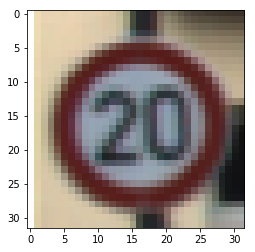

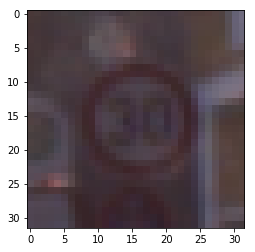

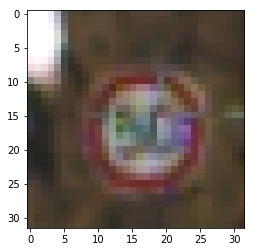

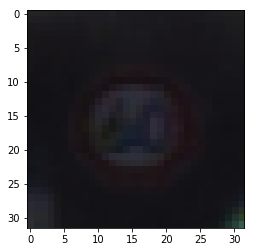

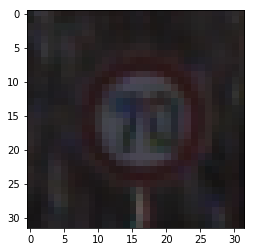

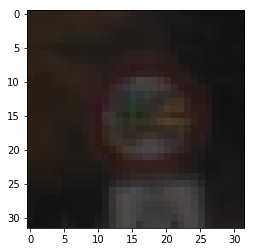

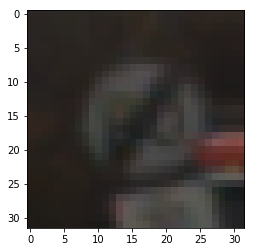

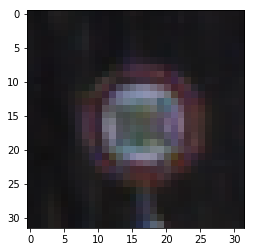

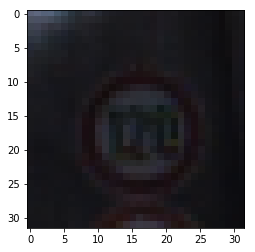

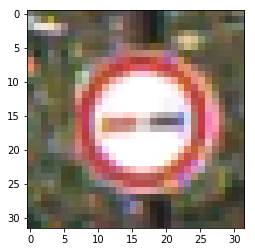

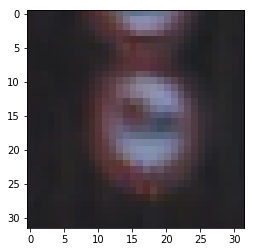

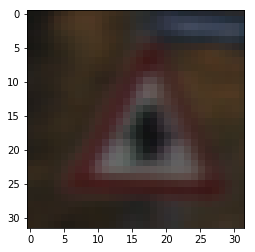

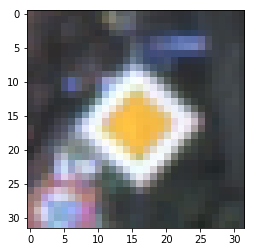

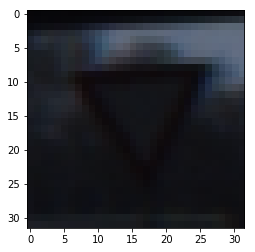

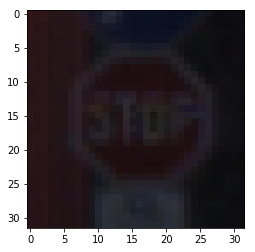

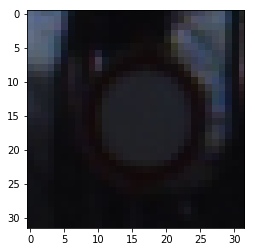

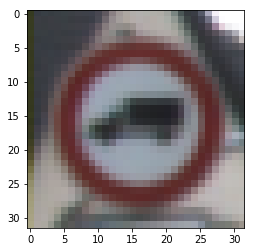

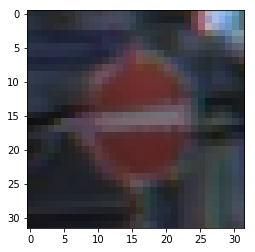

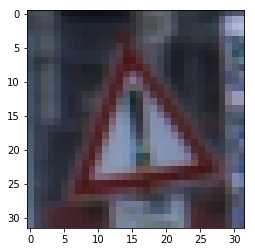

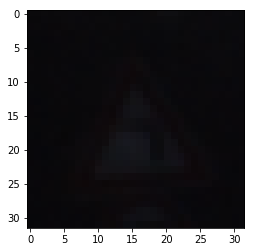

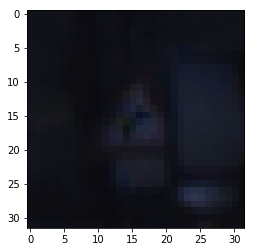

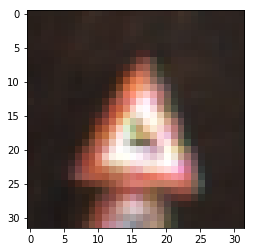

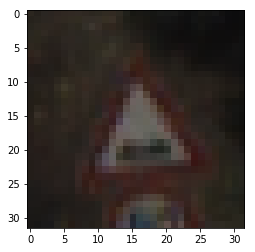

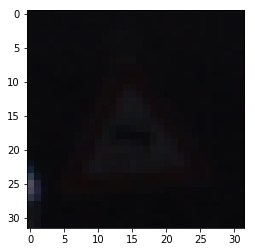

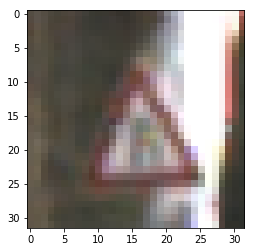

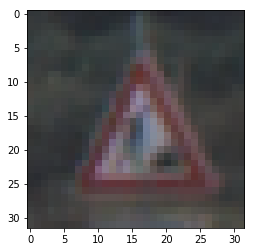

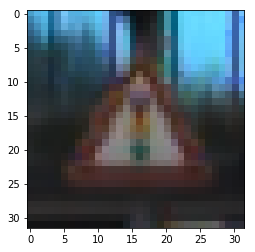

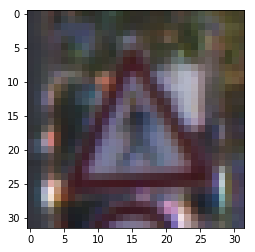

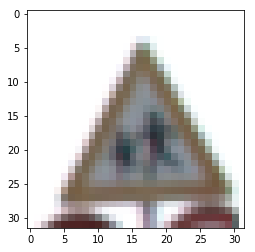

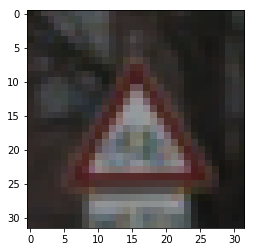

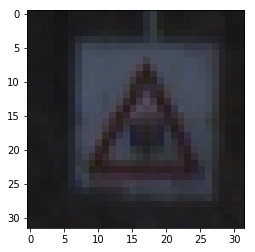

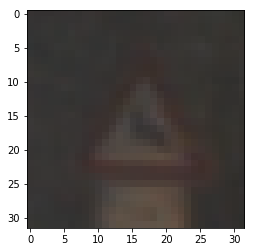

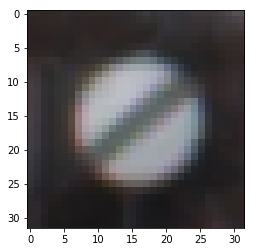

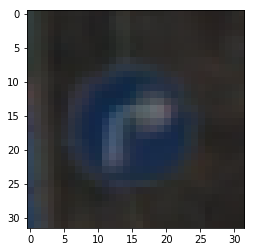

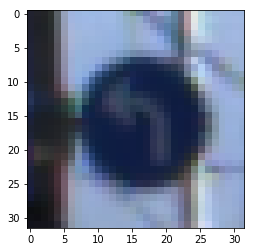

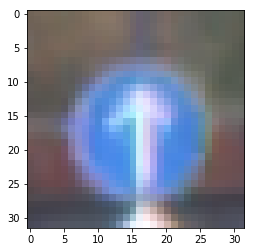

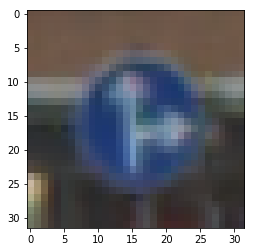

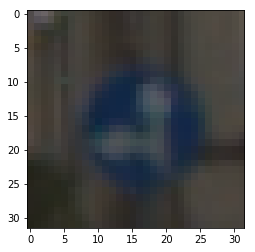

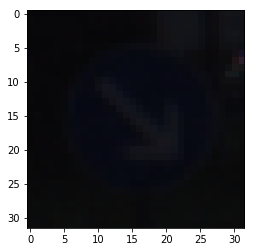

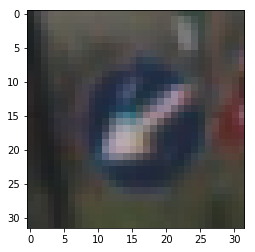

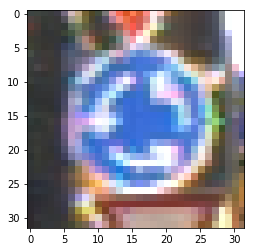

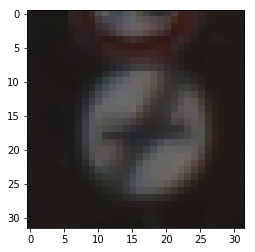

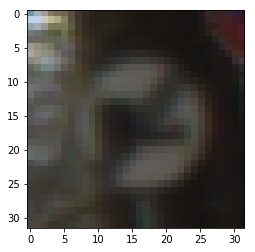

In [3]:
import numpy as np

for i in range(len(np.unique(y_train))):
  class_inds = np.where(y_train==i)[0]
  #print(y_train[class_inds])
  #print(i)
  plt.imshow(X_train[class_inds[0],:,:,:])
  plt.show()

## normalize the data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples in sets
n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
#3d or 2d?
image_shape = np.shape(X_train)[1:3]
print(image_shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
print(n_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

(32, 32)
43
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline

#lets get a count of the sign samples
hist, bin_edges = np.histogram(y_train,n_classes)
plt.bar(bin_edges[:-1], hist)
#plt.show()

print(np.max(hist))

def calculate_output_size(w,k,p,s):
    return (w-k + 2*p)//s -1

calculate_output_size(32,3,0,2)

In [5]:

from skimage.transform import resize
import random
from skimage.transform import rotate
import cv2
from skimage.util import random_noise

def gen_data(image):
 
   newsize = random.randint(32,40)
   image_resized = resize(image, (newsize, newsize, 3),
                          mode='constant',cval=0, 
                          preserve_range=True, clip=True)

   ##edgesize tells us max offset for translation
   edgesize = (newsize-32)//2
        
   offset = random.randint(-edgesize,edgesize) if edgesize>0 else 0 
   #print(offset)
   #noise = np.zeros_like(image_resized)
   #cv2.randn(noise,(0),(4)) 
   #image_resized += noise
   #print(np.max(image_resized))
   center = newsize//2 + offset
   #print(center, offset)
   #sigma = random.uniform(0,.001)
   #noisy = random_noise(image_resized, var=sigma*2)  
   outimage = image_resized[center-16:center+16, center-16:center+16,:]
   return outimage
   #return outimage

    
#for each class bump us to 10000 samples


def dense_to_one_hot(labels_dense, num_classes):
  """Convert class labels from scalars to one-hot vectors."""
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot



In [6]:
import random
import numpy as np
import cv2
from sklearn.preprocessing import minmax_scale, scale

#labels = np.unique(y_train)
#print(labels)
#batch_size = 256
hist_train, _ = np.histogram(y_train,n_classes)   
hist_valid, _ = np.histogram(y_valid,n_classes)   
hist_test, _ = np.histogram(y_test,n_classes)   

def gen_batch(batch_type):
    
    if batch_type == 'train':
        hist = hist_train
        X_data = X_train
        y_data = y_train
    if batch_type == 'valid':
        hist = hist_valid
        X_data = X_valid
        y_data = y_valid
    if batch_type == 'test':
        hist = hist_test
        X_data = X_test
        y_data = y_test
        
        

    n_samples = 10000
    #n_labels = 100
    
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

    while True:
      X = np.zeros([batch_size,32,32,3], dtype='float64')
      labels = [random.randint(0,n_classes-1) for i in range(batch_size)]
      #print(labels)
      for indx, label in enumerate(labels):
         ##find the number of exemplars for this label
         n_labels = hist[label]
         label_indices = np.where(y_data==label)[0]
        
         ##source_image will either be returned or used to 
         ##generate a synthetic image
         image_number = label_indices[random.randint(0,n_labels-1)]
       
         lab = cv2.cvtColor(X_data[image_number,:,:,:], cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
         l, a, b = cv2.split(lab)  # split on 3 different channels

         l2 = clahe.apply(l)  # apply CLAHE to the L-channel
 
         lab = cv2.merge((l2,a,b))  # merge channels
         source_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR).astype('float')          
         #source_image = X_data[image_number,:,:,:].astype('float')
  
         shape = source_image.shape
         ##ravel flattens the image
         source_image = minmax_scale(source_image.ravel(), 
                        feature_range=(0,1)).reshape(shape)

         ##decide whether to use the source image or generate a synthetic
         ##using randint.  The more source images you have the less likely
         ##you are to generate an image.  n_samples is the total number of
         ##samples/class desired.  
         #
         if random.randint(0,n_samples) > n_labels:
            X[indx,:,:,:] = gen_data(source_image)
         else:
            X[indx,:,:,:] = source_image
         y_one_hot = dense_to_one_hot(np.array(labels), n_classes)
        
      yield X, y_one_hot

/Users/alex/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [7]:
train_iterator = gen_batch('train')
valid_iterator = gen_batch('valid')
test_iterator = gen_batch('test')

In [ ]:
batch_x, batch_y = next(train_iterator)
plt.imshow(batch_x[0,:,:,:])
plt.show()

In [ ]:
#Use this to take a look at n random samples from the train set

### Pre-process the Data Set (normalization, grayscale, etc.)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#Lets try the classic VGG net but with fewer conv layers

import tensorflow as tf

initializer = tf.contrib.layers.xavier_initializer()

weights = {
    'wc1': tf.Variable(initializer([3, 3, 3, 32])),
    'wc2': tf.Variable(initializer([3, 3, 32, 128])),
    'wc3': tf.Variable(initializer([3,3, 128, 256])),   
    'wc4': tf.Variable(initializer([3, 3, 256, 512])),
    'wc5': tf.Variable(initializer([1, 1, 512, 64 ])),
    'wd1': tf.Variable(initializer([4*4*64, 512])),
    'wd2': tf.Variable(initializer([512,1024])),
    'out': tf.Variable(initializer([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(initializer([32])),
    'bc2': tf.Variable(initializer([128])),
    'bc3': tf.Variable(initializer([256])),
    'bc4': tf.Variable(initializer([512])),
    'bc5': tf.Variable(initializer([64])),
    'bd1': tf.Variable(initializer([512])),
    'bd2': tf.Variable(initializer([1024])),    
    'out': tf.Variable(initializer([n_classes]))}


prob_vec = tf.Variable(initializer([n_classes]))

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')


def conv_net(x, weights, biases, dropout):
    # Layer 1 - 32*32*1 to 16*16*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides=2)
    conv1 = maxpool2d(conv1, k=1)
    conv1 = tf.nn.lrn(conv1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)      
    
    # Layer 2 - 16*16*32 to 8*8*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides=1)
    conv2 = maxpool2d(conv2, k=1)
    
    # Layer 2 - 16*16*32 to 8*8*64
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'], strides=2)
    conv3 = maxpool2d(conv3, k=1)
  
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'], strides=2)
    conv4 = maxpool2d(conv4, k=1)
       
    conv5 = conv2d(conv4, weights['wc5'], biases['bc5'], strides=1)
    conv5 = maxpool2d(conv5, k=1)
    
    # Fully connected layer - 8*8*64 to 1024
    fc1 = tf.reshape(conv5, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return out



In [13]:
import tensorflow as tf

#hold the incoming image data amd label
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)
soft_max = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
#print(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))


global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.1

learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                          1000000, 0.99, staircase=True)
#learning_rate = .0000001

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost, global_step=global_step)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost, global_step=global_step)

# Accuracy
prob_vec = tf.nn.softmax(logits, 1, name="prob_vec")

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1), name="correct_pred")
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables

saver = tf.train.Saver()
init = tf.global_variables_initializer()

epochs = 15
batch_size = 256

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
#n_classes = 4  # 43 different types of sign
dropout = 0.75  # Dropout, probability to keep units
print("starting model training...")

valid_accuracy, train_accuracy = [],[]

# Launch the graph
run_number = 0

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for batch in range(n_train//batch_size):
            run_number += 1
            #print(batch)
            #print("load batch...")
            batch_x, batch_y = next(train_iterator)
            
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75}) 
           
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, 
                                             keep_prob: 1.})
            
            #regularizer = tf.nn.l2_loss(weights)
           
            #oss = [loss] + regularization_loss
          
            batch_x, batch_y = next(valid_iterator)      
            valid_acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y,
                                                       keep_prob: 1.})
            valid_accuracy.append(valid_acc)
  
 
            batch_x, batch_y = next(train_iterator)
        
            train_acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y,
                                                     keep_prob: 1.})
            train_accuracy.append(train_acc)
            
            if run_number%10 == 0:
              print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Validation Accuracy: {:.6f}'.
                     format(epoch + 1, batch + 1,loss, np.mean(valid_accuracy[:-10])))          
              print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Test Accuracy: {:.6f}'.
                   format(epoch + 1, batch + 1,loss, np.mean(train_accuracy[:-10])))
    
    
    #done with training; run a test batch
    batch_x, batch_y = next(test_iterator) 
    # Calculate Test Accuracy
    sess.run(logits, feed_dict={x: batch_x, y: batch_y,
                                           keep_prob: 1.0})

    
    test_acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y,
                                              keep_prob: 1.})
    
    print('Testing Accuracy: {}'.format(test_acc))
    #saver.save(sess, 'my-model', global_step=step,write_meta_graph=False)
    #saver = tf.train.Saver(max_to_keep=4, keep_checkpoint_every_n_hours=2)
    saver.save(sess, 'model_final')
 


starting model training...


/Users/alex/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/alex/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch  1, Batch  10 - Loss:     3.7719 Validation Accuracy: nan
Epoch  1, Batch  10 - Loss:     3.7719 Test Accuracy: nan
Epoch  1, Batch  20 - Loss:     3.7630 Validation Accuracy: 0.026172
Epoch  1, Batch  20 - Loss:     3.7630 Test Accuracy: 0.024219
Epoch  1, Batch  30 - Loss:     3.7590 Validation Accuracy: 0.027930
Epoch  1, Batch  30 - Loss:     3.7590 Test Accuracy: 0.025391
Epoch  1, Batch  40 - Loss:     3.7585 Validation Accuracy: 0.027344
Epoch  1, Batch  40 - Loss:     3.7585 Test Accuracy: 0.025781
Epoch  1, Batch  50 - Loss:     3.7506 Validation Accuracy: 0.030566
Epoch  1, Batch  50 - Loss:     3.7506 Test Accuracy: 0.027539
Epoch  1, Batch  60 - Loss:     3.7477 Validation Accuracy: 0.031016
Epoch  1, Batch  60 - Loss:     3.7477 Test Accuracy: 0.027891
Epoch  1, Batch  70 - Loss:     3.7359 Validation Accuracy: 0.033984
Epoch  1, Batch  70 - Loss:     3.7359 Test Accuracy: 0.030078
Epoch  1, Batch  80 - Loss:     3.7360 Validation Accuracy: 0.036663
Epoch  1, Batch  

Epoch  5, Batch 100 - Loss:     0.2881 Validation Accuracy: 0.431994
Epoch  5, Batch 100 - Loss:     0.2881 Test Accuracy: 0.505277
Epoch  5, Batch 110 - Loss:     0.2029 Validation Accuracy: 0.437042
Epoch  5, Batch 110 - Loss:     0.2029 Test Accuracy: 0.510968
Epoch  5, Batch 120 - Loss:     0.3939 Validation Accuracy: 0.442121
Epoch  5, Batch 120 - Loss:     0.3939 Test Accuracy: 0.516520
Epoch  5, Batch 130 - Loss:     0.1487 Validation Accuracy: 0.446834
Epoch  5, Batch 130 - Loss:     0.1487 Test Accuracy: 0.521804
Epoch  6, Batch   5 - Loss:     0.2520 Validation Accuracy: 0.451609
Epoch  6, Batch   5 - Loss:     0.2520 Test Accuracy: 0.527140
Epoch  6, Batch  15 - Loss:     0.2438 Validation Accuracy: 0.456003
Epoch  6, Batch  15 - Loss:     0.2438 Test Accuracy: 0.532324
Epoch  6, Batch  25 - Loss:     0.2527 Validation Accuracy: 0.460343
Epoch  6, Batch  25 - Loss:     0.2527 Test Accuracy: 0.537308
Epoch  6, Batch  35 - Loss:     0.1716 Validation Accuracy: 0.464475
Epoch  

Epoch 10, Batch  55 - Loss:     0.0565 Validation Accuracy: 0.616223
Epoch 10, Batch  55 - Loss:     0.0565 Test Accuracy: 0.714624
Epoch 10, Batch  65 - Loss:     0.0887 Validation Accuracy: 0.618049
Epoch 10, Batch  65 - Loss:     0.0887 Test Accuracy: 0.716526
Epoch 10, Batch  75 - Loss:     0.0731 Validation Accuracy: 0.619867
Epoch 10, Batch  75 - Loss:     0.0731 Test Accuracy: 0.718402
Epoch 10, Batch  85 - Loss:     0.0645 Validation Accuracy: 0.621500
Epoch 10, Batch  85 - Loss:     0.0645 Test Accuracy: 0.720225
Epoch 10, Batch  95 - Loss:     0.0959 Validation Accuracy: 0.623140
Epoch 10, Batch  95 - Loss:     0.0959 Test Accuracy: 0.722025
Epoch 10, Batch 105 - Loss:     0.0629 Validation Accuracy: 0.624872
Epoch 10, Batch 105 - Loss:     0.0629 Test Accuracy: 0.723837
Epoch 10, Batch 115 - Loss:     0.0696 Validation Accuracy: 0.626565
Epoch 10, Batch 115 - Loss:     0.0696 Test Accuracy: 0.725595
Epoch 10, Batch 125 - Loss:     0.0363 Validation Accuracy: 0.628225
Epoch 1

Epoch 15, Batch  10 - Loss:     0.0211 Validation Accuracy: 0.695277
Epoch 15, Batch  10 - Loss:     0.0211 Test Accuracy: 0.798750
Epoch 15, Batch  20 - Loss:     0.0435 Validation Accuracy: 0.696205
Epoch 15, Batch  20 - Loss:     0.0435 Test Accuracy: 0.799706
Epoch 15, Batch  30 - Loss:     0.0202 Validation Accuracy: 0.697080
Epoch 15, Batch  30 - Loss:     0.0202 Test Accuracy: 0.800607
Epoch 15, Batch  40 - Loss:     0.0200 Validation Accuracy: 0.697923
Epoch 15, Batch  40 - Loss:     0.0200 Test Accuracy: 0.801530
Epoch 15, Batch  50 - Loss:     0.0160 Validation Accuracy: 0.698784
Epoch 15, Batch  50 - Loss:     0.0160 Test Accuracy: 0.802445
Epoch 15, Batch  60 - Loss:     0.0376 Validation Accuracy: 0.699611
Epoch 15, Batch  60 - Loss:     0.0376 Test Accuracy: 0.803316
Epoch 15, Batch  70 - Loss:     0.0153 Validation Accuracy: 0.700475
Epoch 15, Batch  70 - Loss:     0.0153 Test Accuracy: 0.804213
Epoch 15, Batch  80 - Loss:     0.0186 Validation Accuracy: 0.701365
Epoch 1

In [ ]:
  
batch_x, batch_y = next(test_iterator) 

graph = tf.get_default_graph()

with tf.Session() as sess:
  
    saver = tf.train.import_meta_graph('model_final.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    #print(sess.run('wc1:0'))
    #pvec = graph.get_tensor_by_name("prob_vec:0")
    pvec = sess.run(prob_vec, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
    #print(pvec[:100])
    class_preds = np.argmax(pvec, axis=1).tolist()
    print(class_preds)
    correct_prediction = sess.run(correct_pred, feed_dict={x: batch_x, y: batch_y,
                            keep_prob: 1.}) 
    yvals = [onehot.index(1) for onehot in batch_y.tolist()] 
    print(yvals)
    activation = tf_activation.eval(session=sess,feed_dict={x : batch_x[0,:,:,:]})
    
    from sklearn.metrics import confusion_matrix
    printconfusion_matrix(yvals, class_preds))
    print("confused")
    #print(tf.confusion_matrix(class_preds, yvals))
    
    

In [ ]:
import seaborn as sns; sns.set()
cm = confusion_matrix(yvals, class_preds)
ax = sns.heatmap(cm)

for val in range(len(cm[0])):
    sort_indices = np.argsort(cm[val,:])
    nmissed = np.sum(cm[val,:])-cm[val,val]
    if nmissed != 0:
      print("*****")
      print(val,cm[val,:])
      print("worst confusor {}".format(sort_indices[-2]))
      print(nmissed/np.sum(cm[val,:]))

    
 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")